 ----------------------- **Exploratory Data Analysis** ---------------------- 





Q. What is EDA?

Ans :  Analysis of data using various tools from statistics ,  Linear Algerba,Plotting tools , to uderstand about the data set before doing any computation.

*  this is extremly ***first*** important stage for given any problem  .
* this is called **Exploratory** beacuse we don't know anythingn about dataset.
 
Lets start with an EDA with  "*Hello World of DataScience* "  

**Objective** : Given that the four features (*sepal_length ,sepal_width,  petal_length, petal_width*)of a flower to classify a new flower as belonging to one of  the three IRIS flower classes :- 
1.  setosa
2.   virginica
3. versicolor
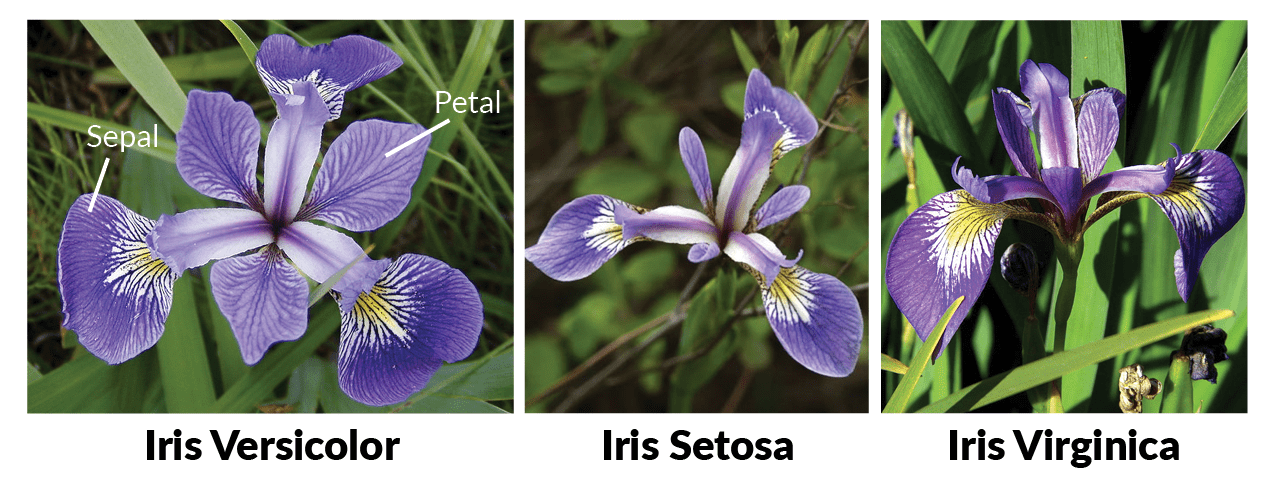






**4 Independent varibale**  :-  sepal_length ,sepal_width, petal_length, 
petal_width

**1 Dependent varibale**  :-  species 
species = species (sepal_length ,sepal_width, petal_length, 
petal_width
) 

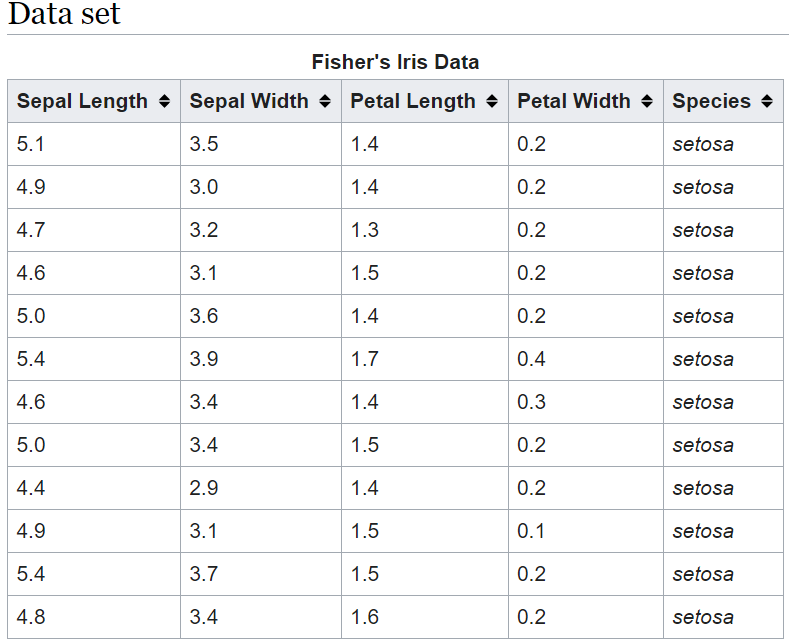

**Doubt **      :

Q. why don't we use color or shape or other variables as a features ?

Ans : by using domain knowlege (botanist) , we have selected this fetures.

* It is very important to use domain knowledeg before going to move forward



In [1]:
# taken a sample dataset from wikipedia link
# https://en.wikipedia.org/wiki/Iris_flower_data_set

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'

#step1. reading a dataset
iris = pd.read_csv(url)
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [2]:
#step2. How many datapoints & features?
print(iris.shape)

(150, 5)


In [3]:
#step3 : What are the column name in our dataset ?
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [4]:
# check dataset is balanced or imbalanced
# Step4 : How many data-points are for each class  (setosa ,verginica, & versicolor) ?
iris["species"].value_counts()

#Note  :  it is balanced dataset, as the no of data-points for each class is same 

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Now Lets start simple plotting tools ...  



> *  **2-D Scatter plot** :  
 It is called as scatter plot beacuse we are scattering all the points (x,y) in the graph 

 We are doing only in 2-D ie. (only two variable x and y ) 
 
 Note : Dimesion means features

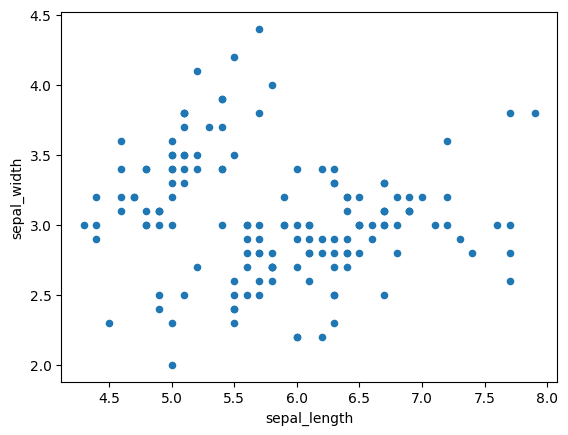

In [5]:
iris.plot(kind="scatter",x="sepal_length",y="sepal_width");
plt.show()

***Observation*** : 
> sepal length varies bewteen [4 , 8]

> septal width varies between [2 , 4.5]


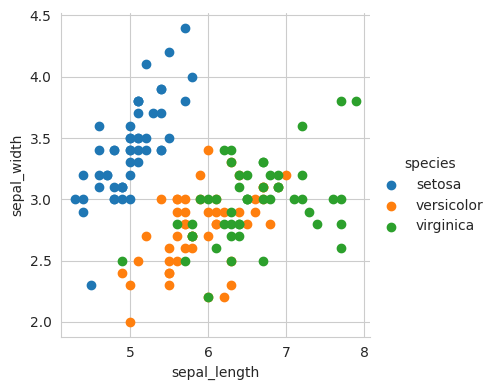

In [6]:
# seaborn gives very nice to plot 2-D scatter plot as compare to matplotlib , let's use it

sns.set_style("whitegrid"); 
sns.FacetGrid(iris,hue="species",height=4).map(plt.scatter, "sepal_length","sepal_width").add_legend(); # hue="species" means  color the category of points in species column
plt.show();  

***Observations*** : 

* Using *sepal_length*  and *sepal_width*  feature , we can distinguish **setosa** flower from others. (ie. Setosa flowers are  **linearly seperable** by dawing a line between setosa and others)


*  versicolor & verginica are **not linearly seperable** using *sepal_length*  and *sepal_width*  features.So we will use other features for these.


***Doubt 1*** : Why can't we draw a 3-D scatter plot  ?

Ans : Yes we can ,but lots of mouse interaction required to interpret data, that's why we avoid it .

* **3-D Scatter Plot**

In [7]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

***Doubt*** : Why can't we draw a 4-D scatter plot  ?

Ans : Can you visualize 4-Dimension ?

* It is very difficult to visulaize 4D ,we live in 3-Dimensional world ,that's why we avoid it.

* But Humans are creative , We use the mathematical tools to visualize higher dimensional data using **pair plot**.


* Here We have  4-dimensional dataset(sepal_length ,sepal_width, petal_length, petal_width) and we can't visulaize 4-D scatter plot , so we will use pair plot to visualize 4-D dataset.
 

  
  * **Pair Plot** :   (Pairwise Scatter Plot)

We will make pair of two features at a time and plot it 
total pairs  =  C(4,2)= 6 

six 2-Dimensional plot (sl,sw)
(sl,pw)
(sl,pl)
(pl,pw)
(pl,sw)
(pl,sl)



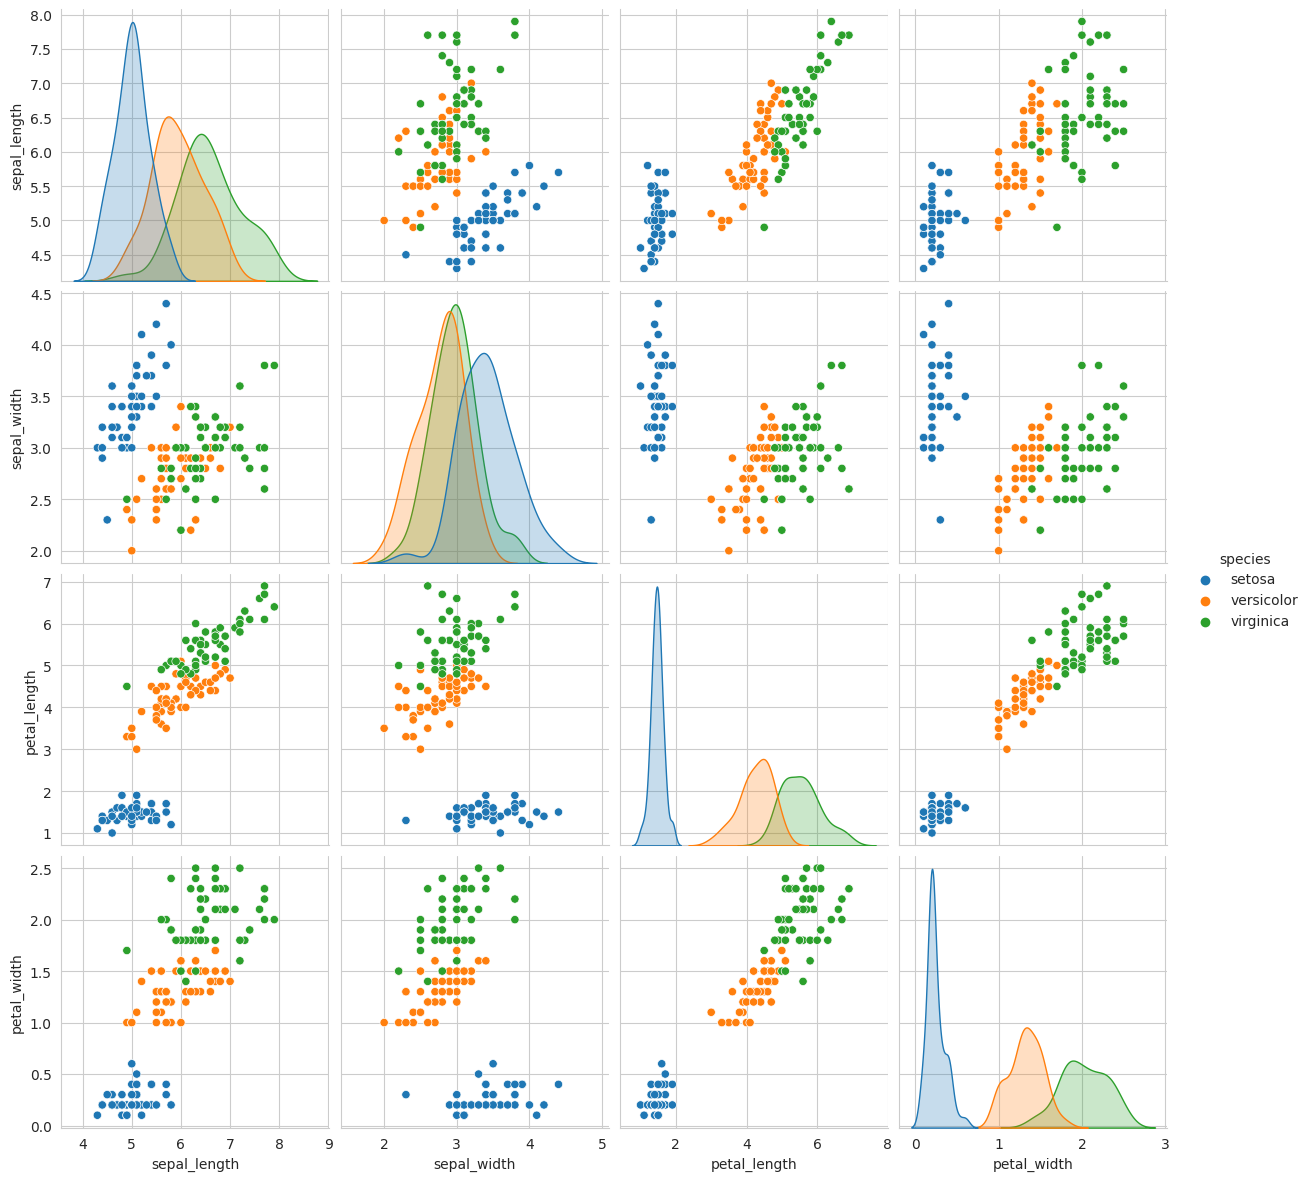

In [8]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3);
plt.show()

***Observations*** 


*   Using petal_length Vs petal_width plot, we can easily seperate all the setosa flowers from others, by using simply if-else statement

  > Classification Algorithm  :     

        if (petal_length<=2) and (petal_width<=1):
            flower_type = setosa
        elif (2.5 <= petal_lenght<=5) and (1<=petal_width < 2):
            flower_type = versicolor        
        else :      
            flower_type = verginica


This algorithm will not perfectly separate between versicolor and verginica ,But It is acceptable ,beacause machine learning is never 100% perfect.







**Limitation of Pair-Plot** : 


       Here we had only 4-Dimensional dataset, So no. of pair plot  = C(4,2)=6,
       for n-Dimensional Dataset , no. of pair plot  = C(n,2)=n*(n-1)/2 

       So pair-plot is not good for the dataset which have more no. of  features
* for n-dimensional dataset , Instead of Pair-Plot , We will use dimesionality reduction techniques such as  **Principle Component Analysis (PCA )**  and  **t-SNE** to visualize data .





# **Histogram & Probability Density Function**

---


       **Doubt** : 
        Q. We have seen 2-D scatter plot , 3-scatter plot and  pair-plot , but what about 1-D scatter plot ? 
                        Ans :  yes we can plot 1-D scatter plot 


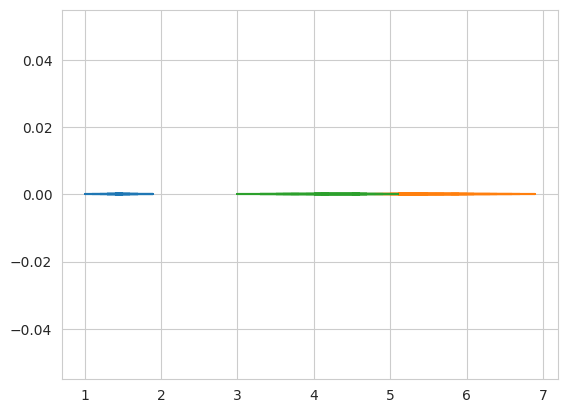

Note  : here y-axis as 0 , and x-axis as petal_length


In [9]:
# 1-D scatter plot for petal_length

# taking dataframe for each type of flower
iris_setosa =  iris.loc[iris["species"]=="setosa"]
iris_virginica =  iris.loc[iris["species"]=="virginica"]
iris_versicolor =  iris.loc[iris["species"]=="versicolor"]


#putting  petal_length on x-axis  and y-axiz as all zero for each type of flower
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']))
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']))
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']))
plt.show()


print("Note  : here y-axis as 0 , and x-axis as petal_length")

**Observation** :  1-D scatter plot is very hard to read , because we don't know how much points are lies between these regions, This is the disadvantage of 1-D scatter plot .

So We will use the **modified 1-D Scatter plot [ Histogram ]** which  will have count of data-points on y-axis and feature on x-axis



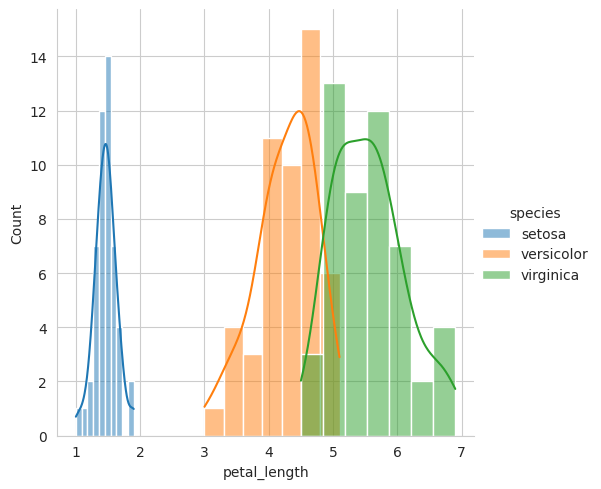

In [10]:
# modified 1-D scatter plot (Histogram) for petal_length feature
sns.FacetGrid(iris,hue="species", height= 5).map(sns.histplot, "petal_length",kde = True ).add_legend();
plt.show()

    Q. What is Probability Density Function ?
    Ans : It is the  smoothed histogram  (join all the ends of histogram bars using a free line gives PDF curve)
    Q. How to smooth a histogram to find PDF ?
    Ans : Using kernal Density Estimation , we will learn this later.

# Univariate Analysis 
       One Variable Analysis
---

Q. Which one of the four variable  (sepal_length ,sepal_width, petal_length ,petal_width) is more useful to distinguish bewteen Setosa, Verginica and Versicolor ?

Ans  :  using univariate analysis we can easily determine this 

      * univariate analysis uses Histogram & PDF to determine which variable is most useful

Let's draw histogram for each features
























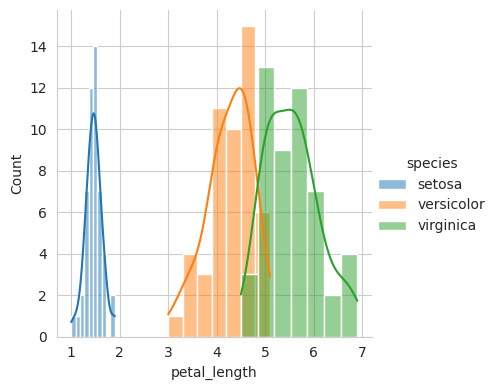

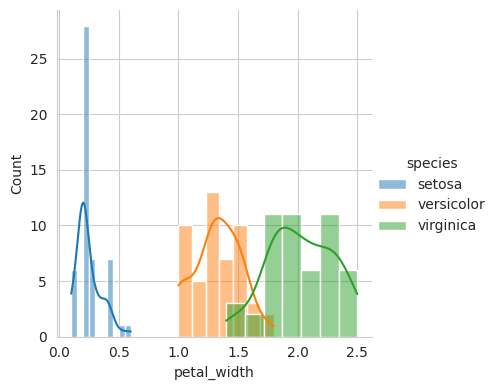

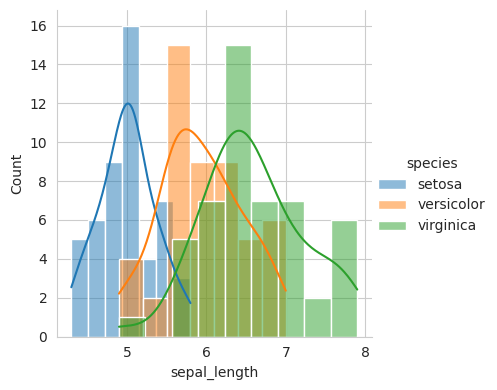

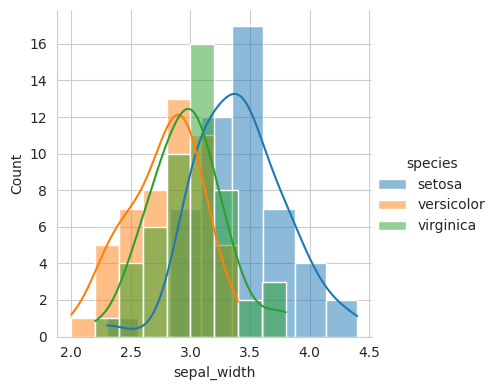

In [11]:
sns.FacetGrid(iris,hue="species", height= 4).map(sns.histplot, "petal_length",kde = True ).add_legend();
sns.FacetGrid(iris,hue="species", height= 4).map(sns.histplot, "petal_width",kde = True ).add_legend();
sns.FacetGrid(iris,hue="species", height= 4).map(sns.histplot, "sepal_length",kde = True ).add_legend();
sns.FacetGrid(iris,hue="species", height= 4).map(sns.histplot, "sepal_width",kde = True ).add_legend();
plt.show()

Observation : Here *petal_length* is most useful variable

**Thumb Rule** :  if the PDF's are well seperated then those feature is more useful
                            
              petal_length > petal_width > sepal_length > sepal_width    
              
    if we have to pick only one feature then we will pick  "petal_length"
    if we have to pick two features then we will pick  "petal_length" and "petal_width"



# Cummulative Distribution Function (CDF) 

---



      CDF = ∫PDF 


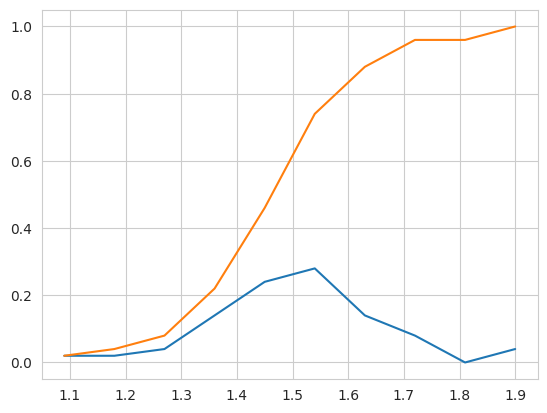

In [12]:
# petal_lenth of setosa flower are broken into 10 bins of histogram to find PDF
counts , bin_edges = np.histogram(iris_setosa['petal_length'],bins=10,density = True)
PDF = counts/sum(counts)
CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF)
plt.plot(bin_edges[1:],CDF)
plt.show()

Above curve is Read As : 
        
        CDF = 60% of setosa flowers have petal_length is less than 1.5
        PDF = 25% of setosa flowers have petal_length is 1.5


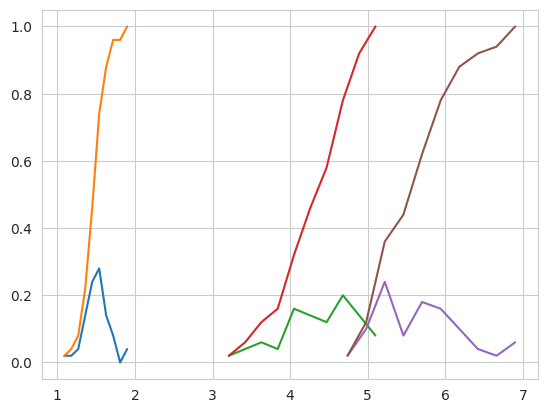

PDF legend:- 
 blue : setosa
 green : versicolor 
 purple : virginica


In [13]:
# PDF & CDF for petal_length for each type of  flowers
# petal_lenth of each flower are broken into 10 bins of histogram to find PDF

#setosa
counts , bin_edges = np.histogram(iris_setosa['petal_length'],bins=10,density = True)
PDF = counts/sum(counts)
CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF)
plt.plot(bin_edges[1:],CDF)

#versicolor
counts , bin_edges = np.histogram(iris_versicolor['petal_length'],bins=10,density = True)
PDF = counts/sum(counts)
CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF)
plt.plot(bin_edges[1:],CDF)

#virginica
counts , bin_edges = np.histogram(iris_virginica['petal_length'],bins=10,density = True)
PDF = counts/sum(counts)
CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF)
plt.plot(bin_edges[1:],CDF)

plt.show()

print("PDF legend:- \n blue : setosa\n green : versicolor \n purple : virginica")

  Obeservation :    Such type of observation about a feature difficult to get without CDF


                if  petal_lenth in  [1,2]:
                    flower_type = setosa                    # by using CDF we can say that is 100% perfect
                elif petal_length in [2,5]:
                    flower_type = versicolor               # by using CDF we can say that , this is 95% accurate 
                else:
                    flower_type = verginica               # by using CDF we can say that ,this gives 10% error 

# Mean ,Variance & Standard Deviation

---


In [14]:
print("means : ")
print(np.mean(iris_setosa["petal_length"]))
print("Mean with outlier as 50 : ",  np.mean(np.append(iris_setosa["petal_length"],50)))

print(np.mean(iris_versicolor["petal_length"]))
print(np.mean(iris_virginica["petal_length"]))


print("\nStandard Deviation : ")
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))
print(np.std(iris_virginica["petal_length"]))


means : 
1.464
Mean with outlier as 50 :  2.4156862745098038
4.26
5.5520000000000005

Standard Deviation : 
0.17176728442867112
0.4651881339845203
0.546347874526844


Obeservation: 

    setosa petal_lenght is small than others.
    versicolor & verginica have slightly equal petal_length .

    Note : Outliers can change the mean so drastically , this is the fundamental problem with mean . 

    * Mean doesn't gives correct info.  , if dataset have outliers. We use new ways of measuring using Median & Standard Deviation. 

  * **Mean**  : central tendency  of distribution 
  * **Variance**  :  Spread of distrution about mean (Average squared distance from mean)
  * **Standard deviation** : 
        setosa has less standard deviation , ie it has thinner spread as compare to others

      Note : Just like mean , one outlier can corrupt varinace & Standard deviation , So we use other mathematical tool such as Median & Quartile.
  


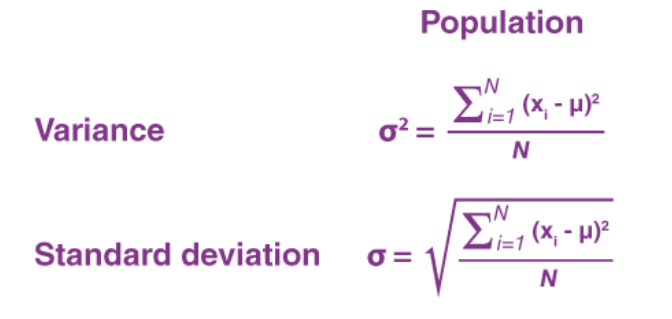

#Median ,Quartile , Percentile , Inter-Quartile Range (IQR) :



---



In [15]:
# Median
print("\nMedian : ")
print(np.median(iris_setosa["petal_length"]))
print("Mean with outlier as 50 : ",  np.median(np.append(iris_setosa["petal_length"],50)))

print(np.median(iris_versicolor["petal_length"]))
print(np.median(iris_virginica["petal_length"]))



Median : 
1.5
Mean with outlier as 50 :  1.5
4.35
5.55


**Median**  :  Sort the data points and choose middle point .
* It is the  replacement of mean in case of outliers
* Unlike Mean & Standard Deviation , Median behaviour does not drastically change with small no. of outlier.
* Median is approximately closed to Mean , so Median can be taken as central tendency
* If more than 50% of data points are outliers only then Median gets corrupted and gives incorrect result.

      Q. How to find Median ? 
      Ans :     Sort the data-points and choose median.
                      if odd no. of data points :    
                            then  median = (n+1)/2 th element
                      if even no, of data points :     
                            then median = Average(n/2 th element  ,n/2 +1 th element)



**Percentile** :    tell us the Rank  in sorted list 

50th Percentile Value = Median (breaking the sorted data-points into two regions)

25th , 50th, 75th and 100th  Percentile Value  is called as Quantiles

      1st Quantile =  25th percentile
      2nd Quantile= 50th percentile = Median
      3rd Quantile= 75th percentile
      4th Quartile = 100th percentile = Maximum Value



In [16]:
# Quartile
# Median Absolute deviation is  equivalent to Standard Deviation 

print("\nQuantiles : ") # all the percentile between 0,100 with the gap of 25% {0th ,25th, 50th , 75th}
print(np.percentile(iris_setosa["petal_length"],np.arange(0,100,25)))
print(np.percentile(iris_versicolor["petal_length"],np.arange(0,100,25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0,100,25)))


#90th percentile
print("\n90th percentiles value : ") 
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))




Quantiles : 
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]

90th percentiles value : 
1.7
4.8
6.31


      CAT exam result : I got 94% percentile in exam 
      Meaning  : 94% of the student marks are below than me
      Note  : Percentile is a measure which gives the percentage of students below you. 
      Hence, in general 100%ile is a misnomer and it is NOT a correct way to portray.

**Median Absolute Deviation (MAD)** :  similar to standard deviation


          * Standard Deviation : Square root of  average distance from mean .  ie. absolute deviation from mean
          * Median Absolute Deviation :  It tells us how far way the points are from median.
          


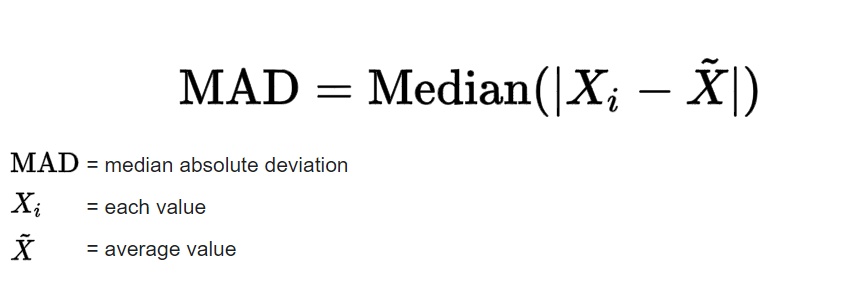

In [17]:
from statsmodels import robust

print("\n Median Absolute Deviation :")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))


 Median Absolute Deviation :
0.14826022185056031
0.5189107764769602
0.6671709983275211


      (Mean, Standard Deviation) :  Good for the dataset have no outliers.
      (Medain, Median Absolute Deviation) : Good for datasets have outliers.

**Inter-Quartile Range (IQR) :**  Range bewteen Quartiles

        Example :     IQR = (75th percentile value - 25th percentile value)
        * IQR is used as approximation of standard deviation


---




**Box Plot & Whiskers** : Another way to visulalizing  1-D Scatter Plot .

It takes the idea of median & quatile ,and plot it.

---
* Histogram are the useful to understand  density of dataset , 
  but It does not gives info about the percentile & Quantile value of dataset ,and percentile values are useful to make conclusion about dataset. 

  So We use Box Plot ,which solve our problem



<function matplotlib.pyplot.show(close=None, block=None)>

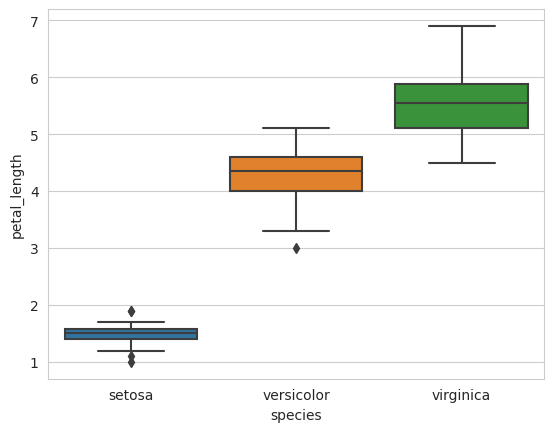

In [18]:
# box plot for petal_length
sns.boxplot(x="species",y='petal_length',data=iris)
plt.show

      Box color meaning : 
      start_line of box :   25th percentile
      middle_line  of box : 50th percentile (median)
      end_line of box : 75th percentile
      
      * End two Wide Lines are called Whiskers. 
      * There is no standard way to draw whiskers . some people choose min-max as whiskers.
      * Whiskers are drawn inn such a way that most of the points falls inside the whiskers
      * dots beyond Whiskers shows outliers

**Violin Plot** : Combined plot of Box-plot , PDF and Histogram

---




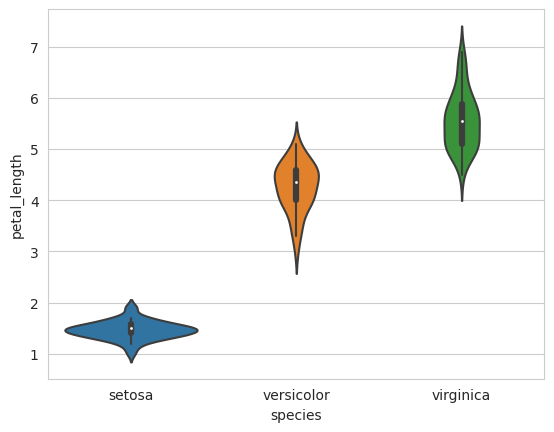

In [19]:
sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

Violin Plot Meaning :         

                    Thick black area shows box plot , with while color at centre shows Median(50th percentile)
                    and curve show PDF

**Summary :**

---

Note : 
 * In each plot always write conclusion/interpretation below  in simple words.
 * Always remember the objective , all data analysis should be align to objective


**Important Teminologies :**
* Univariate Analysis : taking one variable at a time for analysis 
      Univariate Analysis incluses : PDF , CDF , Histogram , Box Plot , violin Plot etc.
* Bi-Variate Analysis: taking two variable at a time for analysis 
      Bi-Variate Analysis includes :  Pair-Plots, 2-D Scatter Plot etc.
* Multi-Variate Analysis :  taking more than two variable at a time for analysis
          Multi-Variate Analysis includes: Pair-plots , 3-D Scatter plot

  *  **Machine Learning is Multi-Variate Analysis**

**Multi-Variate Probability Density , Contour Plot :**

---



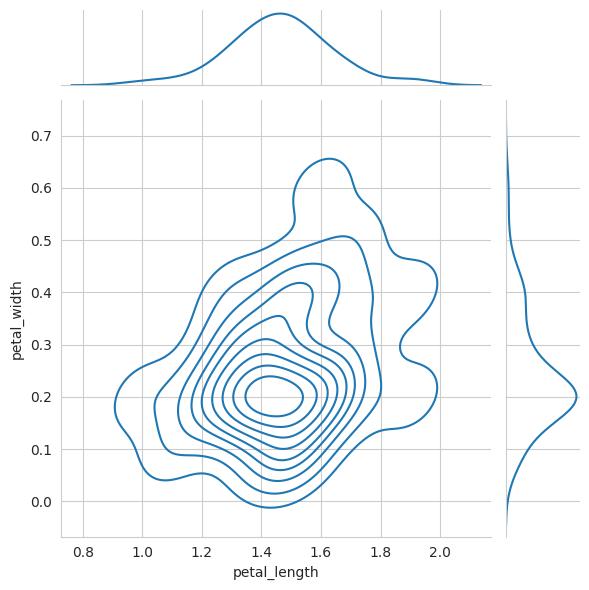

In [20]:
# 2D density plot for setosa flower  or countour probability density plot
sns.jointplot(x="petal_length",y="petal_width",data=iris_setosa, kind = "kde");
plt.show();

Observation :     

            Lots of points lies bewteen small closed region 
            having petal_length is approx 1.4 and petal_width is approx 0.2
            Contour plot gives a sense of density  in 2D space

            * 1Dimensional Density : PDF
            * 2Dimensional Density  : Contour Plot
            * 3Dimesional Density : very difficult to imagine , because we are unable to visualize , what 4D looks like
            

countour plot used in mapping of geological surfaces ,terrain maps.

In countor plot all the boundary lines on the closed surface have same height.

2Dimensional density Plot (or Contour PLot) can be visuaized as  : - 3D Hill

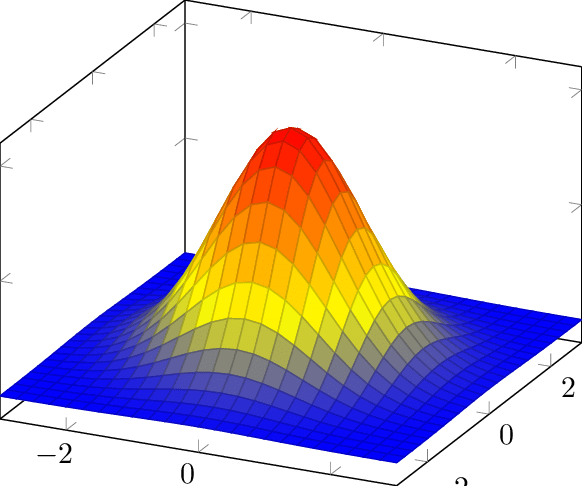

************************* End  ********************************************


---

 
